# linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. 

# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


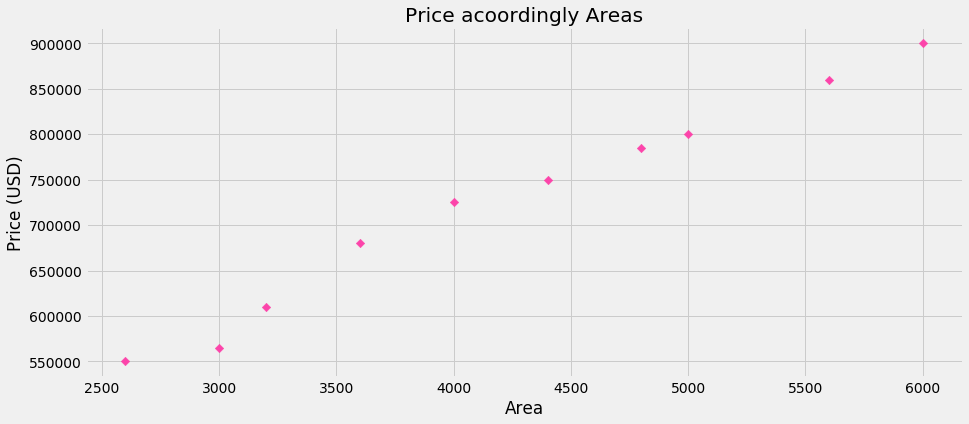

In [4]:
plt.scatter(df.area, df.price, color = '#fc44aa', marker = 'D')

plt.title('Price acoordingly Areas')
plt.xlabel('Area')
plt.ylabel('Price (USD)')
plt.show()

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
reg.predict([[5000]])

array([804247.16397387])

In [7]:
reg.coef_

array([104.80405638])

In [8]:
reg.intercept_

280226.88209006534

In [9]:
reg.rank_

1

In [10]:
reg.singular_

array([3411.15816109])

In [11]:
# y = mx + b
# y/predict = m/coef * area + b/intercept
104.80405638*5000+280226.88209006534

804247.1639900653

In [12]:
104.80405638*5600+280226.88209006534

867129.5978180654

# Multivariate Linear Regression

In [14]:
home = pd.read_csv('home.csv')
home

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [15]:
home.bedrooms.median()

4.0

In [17]:
home.bedrooms = home.bedrooms.fillna(home.bedrooms.median())
home

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
regression = linear_model.LinearRegression()

In [19]:
regression.fit(home[['area', 'bedrooms', 'age']], home.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
regression.predict([[3000, 3, 40]])

array([498408.25158031])

In [21]:
regression.intercept_

221323.00186540408

In [22]:
regression.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [23]:
 # y/price/predict = m1*area + m2*bedrooms + m3*age + b
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 +  221323.00186540408

498408.2515740241

# use of train_test_split() method

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
weather = pd.read_csv('Temp_and_rain.csv')
weather.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [25]:
weather.shape

(1380, 4)

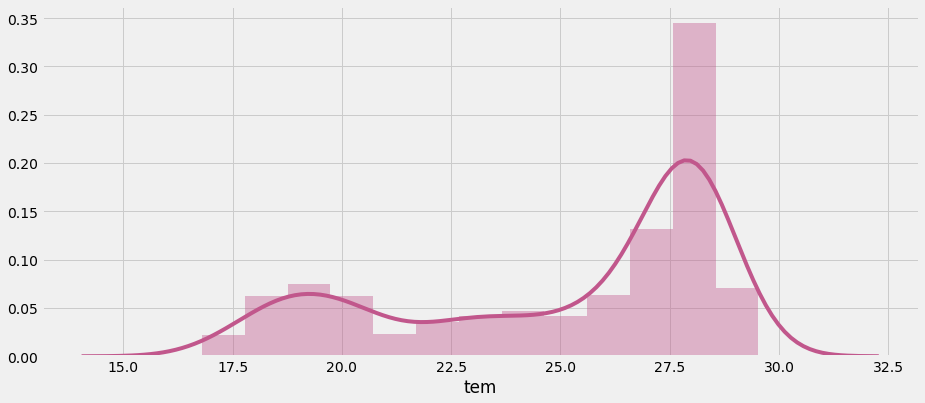

In [26]:
sb.distplot(weather['tem'], color = '#c1578c');

# We want to predict rain base on temp

In [27]:
X = weather['tem'].values.reshape(-1,1)
y = weather['rain'].values.reshape(-1,1)

###### we split 70% of the data to the training set and 30% of the data to test set 


###### test_size variable is the proportion of the test set.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
regre = linear_model.LinearRegression()  
regre.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
regre.coef_

array([[38.64769216]])

In [31]:
regre.intercept_

array([-765.7272056])

In [32]:
y_pred = regre.predict(X_test)

In [34]:
weather_predict = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
weather_predict.head()

,Actual,Predicted
0,12.6682,162.729492
1,224.5770,361.834672
2,118.3250,185.593466
3,3.8527,-59.100532
4,15.5301,195.297902


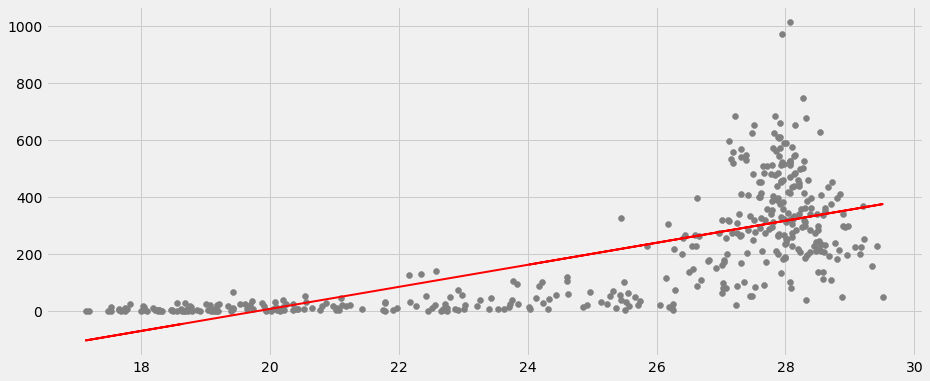

In [35]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [36]:
student = pd.read_csv('student_scores.csv')

In [37]:
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


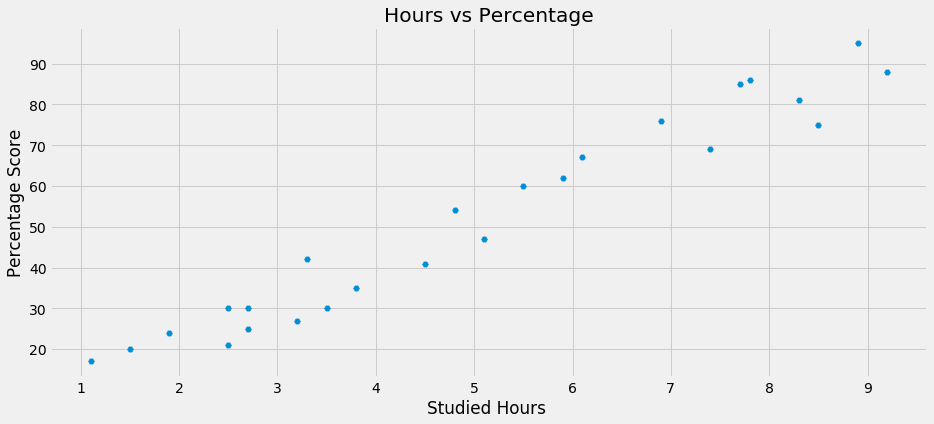

In [42]:
plt.scatter(x = student['Hours'], y = student['Scores'], marker='H')
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours ')
plt.ylabel('Percentage Score')
plt.show()

In [46]:
X = student.iloc[:, :-1].values
y = student.iloc[:, 1].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
regress = linear_model.LinearRegression()

In [49]:
regress.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred = regress.predict(X_test)

In [52]:
student_predict = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
student_predict

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


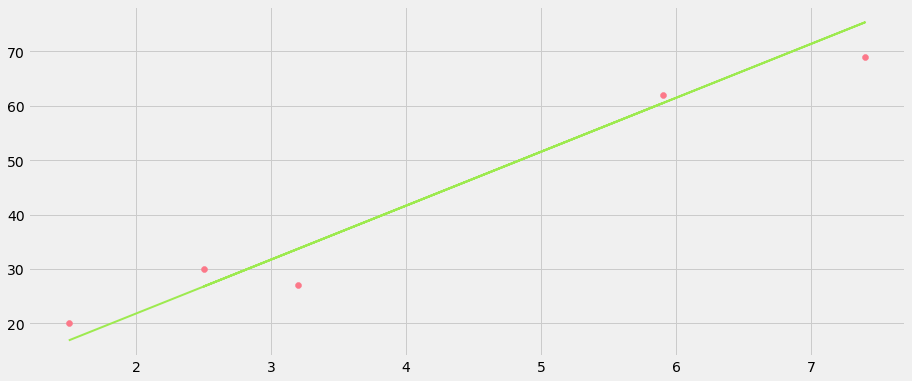

In [56]:
plt.scatter(X_test, y_test,  color='#fc7889') 
plt.plot(X_test, y_pred, color='#9dea4f', linewidth=2)
plt.show()